Generalizing Determminants

In [11]:
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

In [12]:
X = np.array([[1,2,4],[2,-1,3],[0,5,1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [13]:
np.linalg.det(X)

19.999999999999996

Determinants and Eigenvalues

In [14]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [15]:
np.product(lambdas)

19.99999999999999

Here's |det(X)| in NumPy

In [16]:
np.abs(np.linalg.det(X))

19.999999999999996

Let's use matrix B, which is composed of basis vectors, to explore the imapact of applying matrices with varying |det(X)| values:

In [25]:
def plotVectors(vectors,colors):
    plt.figure()
    plt.axvline(x=0,color='lightgray')
    plt.axhline(y=0,color='lightgray')
    
    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],
                   angles='xy',scale_units='xy',scale=1,color=colors[i],)

In [26]:
# function to convert column of matrix to 1D vector:
def vectorfy(mtrx,clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [19]:
B = np.array([[1,0],[0,1]])
B

array([[1, 0],
       [0, 1]])

(-1.0, 3.0)

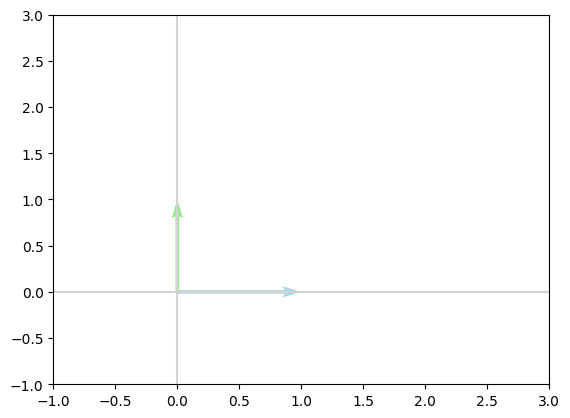

In [27]:
plotVectors([vectorfy(B,0),vectorfy(B,1)],
            ['lightblue','lightgreen'])
plt.xlim(-1,3)
plt.ylim(-1,3)

Let's start by applying the matrix N to B, recalling from earlier that N is singular

In [28]:
N = np.array([[-4,1],[-8,2.]])
N

array([[-4.,  1.],
       [-8.,  2.]])

In [29]:
np.linalg.det(N)

0.0

In [30]:
NB = np.dot(N,B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

(-9.0, 3.0)

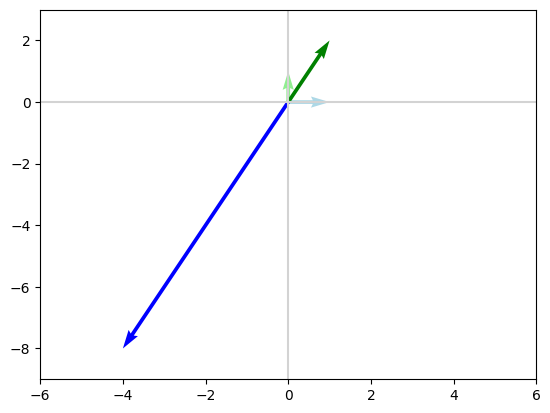

In [32]:
plotVectors([vectorfy(B,0),vectorfy(B,1),vectorfy(NB,0),vectorfy(NB,1)],
            ['lightblue','lightgreen','blue','green'])
plt.xlim(-6,6)
plt.ylim(-9,3)

In [35]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.])

Aha! if any one matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero 

Now let's try applying I to B:

In [39]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [40]:
np.linalg.det(I)

1.0

In [41]:
IB = np.dot(I,B)
IB

array([[1, 0],
       [0, 1]])

(-1.0, 3.0)

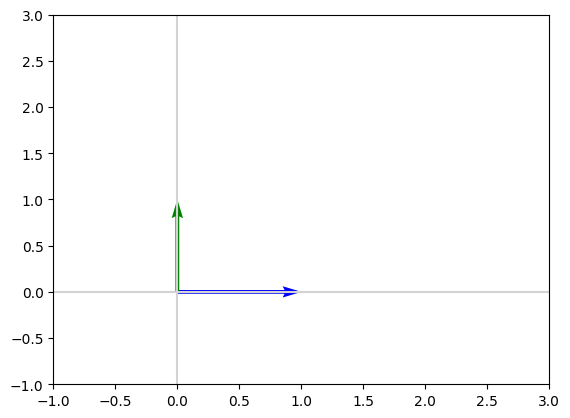

In [44]:
plotVectors([vectorfy(B,0),vectorfy(B,1),vectorfy(IB,0),vectorfy(IB,1)],
            ['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [45]:
lambdas, V = np.linalg.eig(I)
lambdas

array([1., 1.])

All right, so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix J which is more interesting

In [46]:
J = np.array([[-0.5,0],[0,2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [47]:
np.linalg.det(J)

-1.0

In [48]:
np.abs(np.linalg.det(J))

1.0

In [50]:
JB = np.dot(J,B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

(-1.0, 3.0)

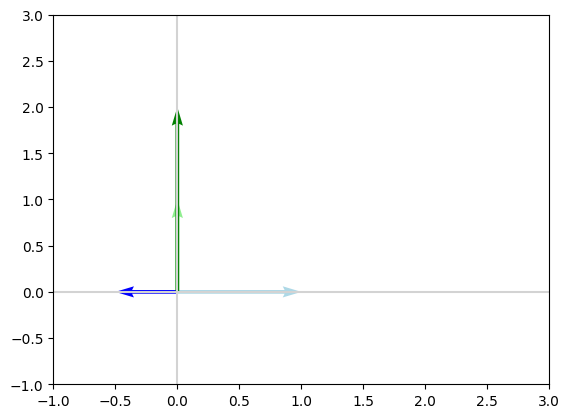

In [51]:
plotVectors([vectorfy(B,0),vectorfy(B,1),vectorfy(JB,0),vectorfy(JB,1)],
            ['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [52]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

Finally, let's apply the matrix *D*, which scales vectors by doubling along both the *x* and *y* axes

In [53]:
D = I * 2
D

array([[2, 0],
       [0, 2]])

In [54]:
np.linalg.det(D)

4.0

In [55]:
DB = np.dot(D,B)
DB

array([[2, 0],
       [0, 2]])

(-1.0, 3.0)

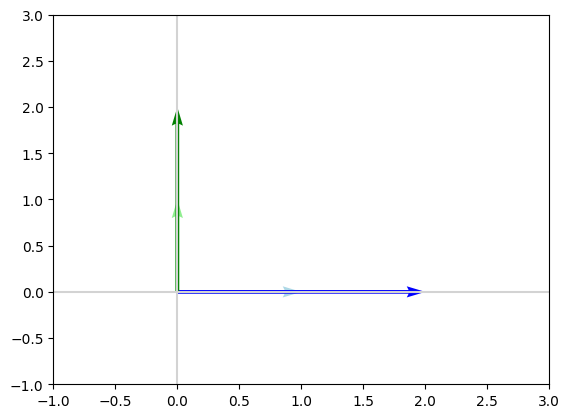

In [56]:
plotVectors([vectorfy(B,0),vectorfy(B,1),vectorfy(DB,0),vectorfy(DB,1)],
            ['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [58]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])